In [94]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Desicion Tree

### Leer datos

In [95]:
data_ocupacion= pd.read_csv('./clasificacion_ocupacion.csv', index_col=0)
data_ocupacion.head()

,hora_inicio_viaje,p31_hora_llegada,tiempo_viaje,p17_Id_motivo_viaje,p30_camino_cuadras,p30_camino_minutos,p32_lunes,p32_martes,p32_miercoles,p32_jueves,p32_viernes,p32_sabado,p32_domingo,p32_ocasional,p33_aplicacion_antes_viaje,modo_principal,edad,etiqueta_ocupacion,p15v_subsidio_SITP,A-ITTP
2,0.2500,0.3125,90.0,trabajo,4.0,15.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,SITP,28,empleado_privado,4.0,303.53
3,0.3333,0.3472,20.0,trabajo,5.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,SITP,21,estudiante_pre,4.0,54.64
12,0.2292,0.2500,30.0,trabajo,10.0,30.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,A pie,48,independiente,4.0,1.38
13,0.6285,0.6319,5.0,trabajo,3.0,4.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,A pie,32,empleado_privado,4.0,379.59
17,0.2708,0.2917,30.0,buscar/dejar alguien,3.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,A pie,43,dedicado_hogar,4.0,286.43


In [96]:
print(data_ocupacion['etiqueta_ocupacion'].nunique())
print(data_ocupacion['etiqueta_ocupacion'].unique())

22
['empleado_privado' 'estudiante_pre' 'independiente' 'dedicado_hogar'
 'no_ocupado' 'pensionado' 'estudiante_inf' 'empleado_público'
 'estudiante_colegio' 'desempleado' 'jornalero' 'estudiante_tec'
 'rentista' 'estudiante_pos' 'vendedor_informal' 'conductor_mensajero'
 'obrero' 'incapacitado' 'empleado_doméstico' 'sin_remuneracion'
 'empleador' 'jardín']


### Variables categoricas a float

In [97]:
y = data_ocupacion['etiqueta_ocupacion']
print(y.head())

X = data_ocupacion.drop('etiqueta_ocupacion', axis=1)
# convert categorical variables to float
X = pd.get_dummies(X, dtype=float)
print(X.head())


2     empleado_privado
3       estudiante_pre
12       independiente
13    empleado_privado
17      dedicado_hogar
Name: etiqueta_ocupacion, dtype: object
    hora_inicio_viaje  p31_hora_llegada  tiempo_viaje  p30_camino_cuadras  \
2              0.2500            0.3125          90.0                 4.0   
3              0.3333            0.3472          20.0                 5.0   
12             0.2292            0.2500          30.0                10.0   
13             0.6285            0.6319           5.0                 3.0   
17             0.2708            0.2917          30.0                 3.0   

    p30_camino_minutos  p32_lunes  p32_martes  p32_miercoles  p32_jueves  \
2                 15.0        1.0         1.0            1.0         1.0   
3                  5.0        1.0         1.0            1.0         1.0   
12                30.0        1.0         1.0            1.0         1.0   
13                 4.0        1.0         1.0            1.0         1.0   
17

### Split dataset 0.7 train y 0.3 test

In [98]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [99]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [100]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.34526728788621874


## Arbol de decision matriz de confusion y metricas

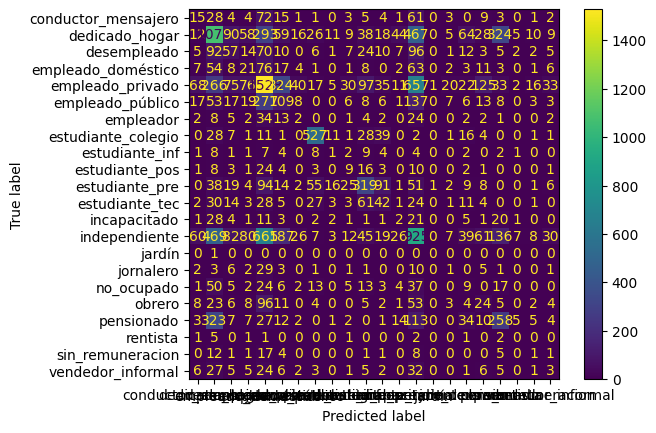

                     precision    recall  f1-score   support

conductor_mensajero       0.07      0.06      0.07       232
     dedicado_hogar       0.41      0.40      0.41      2661
        desempleado       0.14      0.13      0.13       429
 empleado_doméstico       0.07      0.07      0.07       288
   empleado_privado       0.45      0.44      0.44      3481
   empleado_público       0.14      0.16      0.14       698
          empleador       0.02      0.02      0.02       104
 estudiante_colegio       0.75      0.78      0.76       679
     estudiante_inf       0.02      0.02      0.02        55
     estudiante_pos       0.07      0.10      0.09        86
     estudiante_pre       0.46      0.42      0.44       756
     estudiante_tec       0.15      0.16      0.15       260
       incapacitado       0.02      0.02      0.02       105
      independiente       0.33      0.32      0.33      2894
             jardín       0.00      0.00      0.00         1
          jornalero    

In [101]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

print(classification_report(y_test, y_pred))

In [102]:
def plot_roc_curve(test_y, pred_y):
  """Trazar la curva ROC a partir de las respuestas correctas y las predicciones

  Args:
      test_y (ndarray of shape (n_samples,)): y
      pred_y (ndarray of shape (n_samples,)): Valor previsto para y
  """
  # Tasa de falsos positivos, tasa de verdaderos positivos
  fprs, tprs, _ = roc_curve(test_y, pred_y, pos_label=1)

  # gráfico ROC-AUC
  plt.figure(figsize=(8, 8))
  plt.plot([0, 1], [0, 1], linestyle="-", c="k", alpha=0.2, label="ROC-AUC=0.5")
  plt.plot(fprs, tprs, color="orange", label="ROC Curve")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")

  # Rellene el área correspondiente a la puntuación ROC-AUC
  y_zeros = [0 for _ in tprs]
  plt.fill_between(fprs, y_zeros, tprs, color="orange", alpha=0.3, label="ROC-AUC")
  plt.legend()
  plt.show()

In [103]:
y_test = pd.DataFrame(y_test.to_numpy(),columns=['values'])
y_pred = pd.DataFrame(y_pred,columns=['values'])
print(y_test.head())
print(y_pred.head())

               values
0  estudiante_colegio
1       independiente
2  estudiante_colegio
3         desempleado
4          no_ocupado
               values
0  estudiante_colegio
1    empleado_privado
2          no_ocupado
3        incapacitado
4      dedicado_hogar


In [104]:
cat = ['empleado_privado', 'estudiante_pre', 'independiente', 'dedicado_hogar',\
       'no_ocupado', 'pensionado', 'estudiante_inf', 'empleado_público',\
       'estudiante_colegio', 'desempleado', 'jornalero', 'estudiante_tec',\
       'rentista', 'estudiante_pos', 'vendedor_informal', 'conductor_mensajero',\
       'obrero', 'incapacitado', 'empleado_doméstico', 'sin_remuneracion',\
       'empleador', 'jardín']
num = [i for i in range(22)]
print(cat)
print(num)
# cat to num
y_test['values'].replace(cat, num, inplace=True)
y_pred['values'].replace(cat, num, inplace=True)
print(y_test.head())
print(y_pred.head())

['empleado_privado', 'estudiante_pre', 'independiente', 'dedicado_hogar', 'no_ocupado', 'pensionado', 'estudiante_inf', 'empleado_público', 'estudiante_colegio', 'desempleado', 'jornalero', 'estudiante_tec', 'rentista', 'estudiante_pos', 'vendedor_informal', 'conductor_mensajero', 'obrero', 'incapacitado', 'empleado_doméstico', 'sin_remuneracion', 'empleador', 'jardín']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
   values
0       8
1       2
2       8
3       9
4       4
   values
0       8
1       0
2       4
3      17
4       3


## Arbol de decision curva ROC

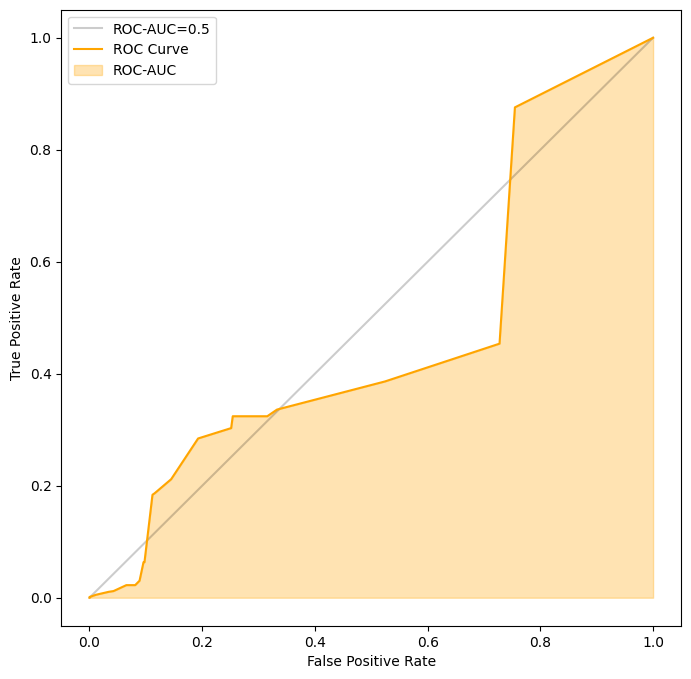

In [105]:
plot_roc_curve(y_test, y_pred)

In [106]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus

# Plotting tree

#dot_data = StringIO()
#export_graphviz(clf, out_file=dot_data,  
#                filled=True, rounded=True,
#                special_characters=True)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('tree_ingreso.png')
#Image(graph.create_png())

# Kneibors Classifier

### Leer datos

In [107]:
data_ocupacion= pd.read_csv('./clasificacion_ocupacion.csv', index_col=0)
data_ocupacion.head()

,hora_inicio_viaje,p31_hora_llegada,tiempo_viaje,p17_Id_motivo_viaje,p30_camino_cuadras,p30_camino_minutos,p32_lunes,p32_martes,p32_miercoles,p32_jueves,p32_viernes,p32_sabado,p32_domingo,p32_ocasional,p33_aplicacion_antes_viaje,modo_principal,edad,etiqueta_ocupacion,p15v_subsidio_SITP,A-ITTP
2,0.2500,0.3125,90.0,trabajo,4.0,15.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,SITP,28,empleado_privado,4.0,303.53
3,0.3333,0.3472,20.0,trabajo,5.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,SITP,21,estudiante_pre,4.0,54.64
12,0.2292,0.2500,30.0,trabajo,10.0,30.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,A pie,48,independiente,4.0,1.38
13,0.6285,0.6319,5.0,trabajo,3.0,4.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,A pie,32,empleado_privado,4.0,379.59
17,0.2708,0.2917,30.0,buscar/dejar alguien,3.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,A pie,43,dedicado_hogar,4.0,286.43


In [108]:
print(data_ocupacion['etiqueta_ocupacion'].nunique())
print(data_ocupacion['etiqueta_ocupacion'].unique())

22
['empleado_privado' 'estudiante_pre' 'independiente' 'dedicado_hogar'
 'no_ocupado' 'pensionado' 'estudiante_inf' 'empleado_público'
 'estudiante_colegio' 'desempleado' 'jornalero' 'estudiante_tec'
 'rentista' 'estudiante_pos' 'vendedor_informal' 'conductor_mensajero'
 'obrero' 'incapacitado' 'empleado_doméstico' 'sin_remuneracion'
 'empleador' 'jardín']


### Variables categoricas a float

In [109]:
y = data_ocupacion['etiqueta_ocupacion']
print(y.head())

X = data_ocupacion.drop('etiqueta_ocupacion', axis=1)
# convert categorical variables to float
X = pd.get_dummies(X, dtype=float)
print(X.head())


2     empleado_privado
3       estudiante_pre
12       independiente
13    empleado_privado
17      dedicado_hogar
Name: etiqueta_ocupacion, dtype: object
    hora_inicio_viaje  p31_hora_llegada  tiempo_viaje  p30_camino_cuadras  \
2              0.2500            0.3125          90.0                 4.0   
3              0.3333            0.3472          20.0                 5.0   
12             0.2292            0.2500          30.0                10.0   
13             0.6285            0.6319           5.0                 3.0   
17             0.2708            0.2917          30.0                 3.0   

    p30_camino_minutos  p32_lunes  p32_martes  p32_miercoles  p32_jueves  \
2                 15.0        1.0         1.0            1.0         1.0   
3                  5.0        1.0         1.0            1.0         1.0   
12                30.0        1.0         1.0            1.0         1.0   
13                 4.0        1.0         1.0            1.0         1.0   
17

### Split dataset into training set and test set

In [110]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [111]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [112]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [113]:
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  24   42    4    3  105    5    0    2    0    0    0    0    0   42
     0    0    0    1    4    0    0    0]
 [  30 1753  104   38  202   29    6   12    9    2   16    4    9  261
     0    1   10    1  174    0    0    0]
 [  11  175   58   10   76    6    0    7    2    1   19    3    1   53
     0    0    2    0    5    0    0    0]
 [  10   76    9   26  103    7    2    1    0    1    0    0    2   41
     0    0    0    1    8    0    0    1]
 [ 141  470   99   87 2003  147    8   16    0    1   52    6    3  402
     0    0    3   20   19    0    1    3]
 [  33   83   16   28  349   69    1    3    1    3    6    1    1   93
     0    0    0    3    8    0    0    0]
 [   6   22    3    2   47    3    2    0    0    0    1    0    0   18
     0    0    0    0    0    0    0    0]
 [   6   77   14    3   35    5    0  455    2    0   62   10    0    9
     0    0    1    0    0    0    0    0]
 [   2   10    3    0    6    2    0    9    0    0   11    1    0   10
     0  

/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Using Cross Validation to Get the Best Value of k

Text(0, 0.5, 'Accuracy Score')

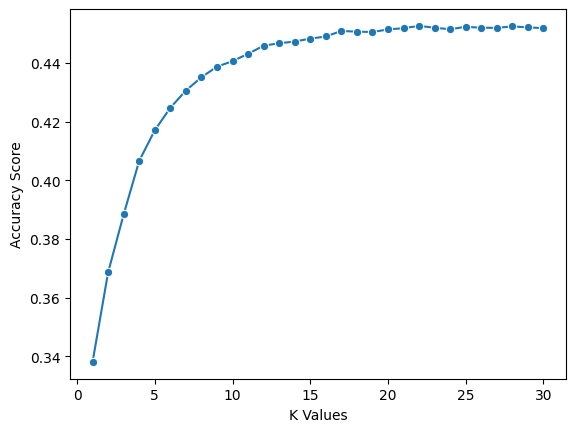

In [114]:
from sklearn.model_selection import cross_val_score
import seaborn as sns

k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(knn, X, y, cv=5)
  scores.append(np.mean(score))

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

## KNeighbors matriz de confusion y metricas

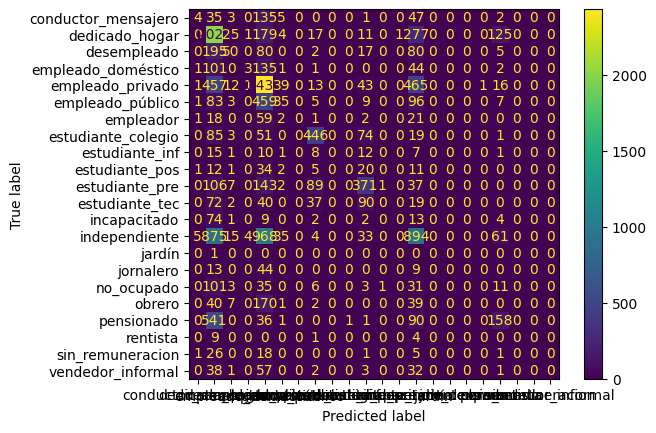

                     precision    recall  f1-score   support

conductor_mensajero       0.27      0.02      0.03       232
     dedicado_hogar       0.41      0.76      0.53      2661
        desempleado       0.37      0.12      0.18       429
 empleado_doméstico       0.33      0.01      0.02       288
   empleado_privado       0.48      0.70      0.57      3481
   empleado_público       0.27      0.05      0.08       698
          empleador       0.00      0.00      0.00       104
 estudiante_colegio       0.70      0.66      0.68       679
     estudiante_inf       0.00      0.00      0.00        55
     estudiante_pos       0.00      0.00      0.00        86
     estudiante_pre       0.54      0.49      0.51       756
     estudiante_tec       0.00      0.00      0.00       260
       incapacitado       0.00      0.00      0.00       105
      independiente       0.40      0.31      0.35      2894
             jardín       0.00      0.00      0.00         1
          jornalero    

/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [115]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

print(classification_report(y_test, y_pred))

In [116]:
y_test = pd.DataFrame(y_test.to_numpy(),columns=['values'])
y_pred = pd.DataFrame(y_pred,columns=['values'])
print(y_test.head())
print(y_pred.head())

               values
0  estudiante_colegio
1       independiente
2  estudiante_colegio
3         desempleado
4          no_ocupado
               values
0  estudiante_colegio
1    empleado_privado
2    empleado_privado
3      dedicado_hogar
4    empleado_privado


In [117]:
cat = ['empleado_privado', 'estudiante_pre', 'independiente', 'dedicado_hogar',\
       'no_ocupado', 'pensionado', 'estudiante_inf', 'empleado_público',\
       'estudiante_colegio', 'desempleado', 'jornalero', 'estudiante_tec',\
       'rentista', 'estudiante_pos', 'vendedor_informal', 'conductor_mensajero',\
       'obrero', 'incapacitado', 'empleado_doméstico', 'sin_remuneracion',\
       'empleador', 'jardín']
num = [i for i in range(22)]
print(cat)
print(num)
# cat to num
y_test['values'].replace(cat, num, inplace=True)
y_pred['values'].replace(cat, num, inplace=True)
print(y_test.head())
print(y_pred.head())

['empleado_privado', 'estudiante_pre', 'independiente', 'dedicado_hogar', 'no_ocupado', 'pensionado', 'estudiante_inf', 'empleado_público', 'estudiante_colegio', 'desempleado', 'jornalero', 'estudiante_tec', 'rentista', 'estudiante_pos', 'vendedor_informal', 'conductor_mensajero', 'obrero', 'incapacitado', 'empleado_doméstico', 'sin_remuneracion', 'empleador', 'jardín']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
   values
0       8
1       2
2       8
3       9
4       4
   values
0       8
1       0
2       0
3       3
4       0


## KNeighbors curva ROC

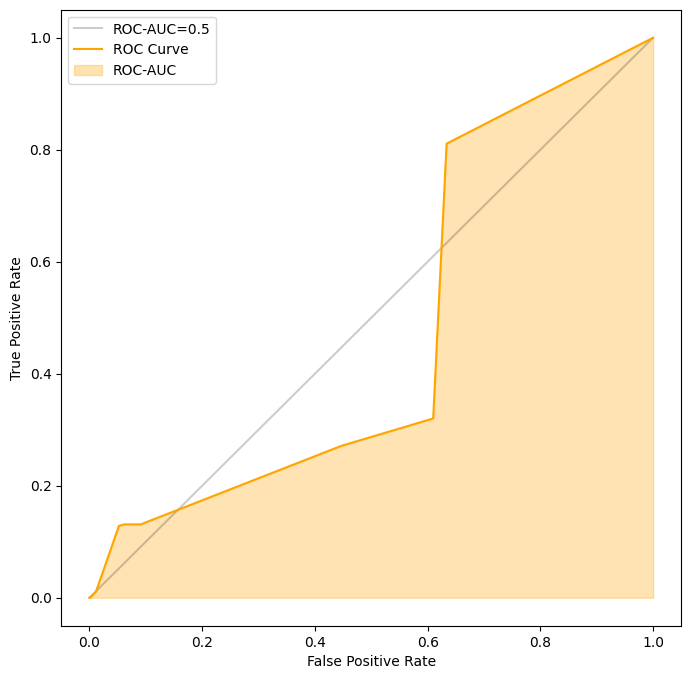

In [118]:
plot_roc_curve(y_test, y_pred)

# Naive Bayes

### Leer datos

In [119]:
data_ocupacion= pd.read_csv('./clasificacion_ocupacion.csv', index_col=0)
data_ocupacion.head()

,hora_inicio_viaje,p31_hora_llegada,tiempo_viaje,p17_Id_motivo_viaje,p30_camino_cuadras,p30_camino_minutos,p32_lunes,p32_martes,p32_miercoles,p32_jueves,p32_viernes,p32_sabado,p32_domingo,p32_ocasional,p33_aplicacion_antes_viaje,modo_principal,edad,etiqueta_ocupacion,p15v_subsidio_SITP,A-ITTP
2,0.2500,0.3125,90.0,trabajo,4.0,15.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,SITP,28,empleado_privado,4.0,303.53
3,0.3333,0.3472,20.0,trabajo,5.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,SITP,21,estudiante_pre,4.0,54.64
12,0.2292,0.2500,30.0,trabajo,10.0,30.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,A pie,48,independiente,4.0,1.38
13,0.6285,0.6319,5.0,trabajo,3.0,4.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,A pie,32,empleado_privado,4.0,379.59
17,0.2708,0.2917,30.0,buscar/dejar alguien,3.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,A pie,43,dedicado_hogar,4.0,286.43


In [120]:
print(data_ocupacion['etiqueta_ocupacion'].nunique())
print(data_ocupacion['etiqueta_ocupacion'].unique())

22
['empleado_privado' 'estudiante_pre' 'independiente' 'dedicado_hogar'
 'no_ocupado' 'pensionado' 'estudiante_inf' 'empleado_público'
 'estudiante_colegio' 'desempleado' 'jornalero' 'estudiante_tec'
 'rentista' 'estudiante_pos' 'vendedor_informal' 'conductor_mensajero'
 'obrero' 'incapacitado' 'empleado_doméstico' 'sin_remuneracion'
 'empleador' 'jardín']


### Variables categoricas a float

In [121]:
y = data_ocupacion['etiqueta_ocupacion']
print(y.head())

X = data_ocupacion.drop('etiqueta_ocupacion', axis=1)
# convert categorical variables to float
X = pd.get_dummies(X, dtype=float)
print(X.head())


2     empleado_privado
3       estudiante_pre
12       independiente
13    empleado_privado
17      dedicado_hogar
Name: etiqueta_ocupacion, dtype: object
    hora_inicio_viaje  p31_hora_llegada  tiempo_viaje  p30_camino_cuadras  \
2              0.2500            0.3125          90.0                 4.0   
3              0.3333            0.3472          20.0                 5.0   
12             0.2292            0.2500          30.0                10.0   
13             0.6285            0.6319           5.0                 3.0   
17             0.2708            0.2917          30.0                 3.0   

    p30_camino_minutos  p32_lunes  p32_martes  p32_miercoles  p32_jueves  \
2                 15.0        1.0         1.0            1.0         1.0   
3                  5.0        1.0         1.0            1.0         1.0   
12                30.0        1.0         1.0            1.0         1.0   
13                 4.0        1.0         1.0            1.0         1.0   
17

### Split dataset into training set and test set

In [122]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [123]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [124]:
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

print('Model accuracy score: {0:0.4f}'. format(metrics.accuracy_score(y_test, y_pred)))

Model accuracy score: 0.0126


### Check for overfitting and underfitting

In [125]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.0141
Test set score: 0.0126


The training-set accuracy score is 0.2325 while the test-set accuracy to be 0.2325. These two values are quite comparable. So, there is no sign of overfitting.

## Naive Bayes matriz de confusion y metricas

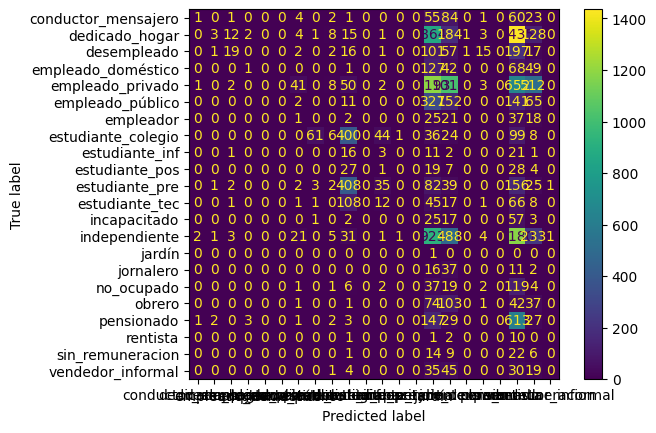

                     precision    recall  f1-score   support

conductor_mensajero       0.20      0.00      0.01       232
     dedicado_hogar       0.38      0.00      0.00      2661
        desempleado       0.46      0.04      0.08       429
 empleado_doméstico       0.17      0.00      0.01       288
   empleado_privado       0.00      0.00      0.00      3481
   empleado_público       0.00      0.00      0.00       698
          empleador       0.01      0.01      0.01       104
 estudiante_colegio       0.91      0.09      0.16       679
     estudiante_inf       0.00      0.00      0.00        55
     estudiante_pos       0.02      0.31      0.05        86
     estudiante_pre       0.00      0.00      0.00       756
     estudiante_tec       0.12      0.05      0.07       260
       incapacitado       0.00      0.00      0.00       105
      independiente       0.00      0.00      0.00      2894
             jardín       0.00      1.00      0.00         1
          jornalero    

/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [126]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()
plt.show()

print(classification_report(y_test, y_pred))

In [127]:
y_test = pd.DataFrame(y_test.to_numpy(),columns=['values'])
y_pred = pd.DataFrame(y_pred,columns=['values'])
print(y_test.head())
print(y_pred.head())

               values
0  estudiante_colegio
1       independiente
2  estudiante_colegio
3         desempleado
4          no_ocupado
               values
0  estudiante_colegio
1           jornalero
2            rentista
3    sin_remuneracion
4              jardín


In [128]:
cat = ['empleado_privado', 'estudiante_pre', 'independiente', 'dedicado_hogar',\
       'no_ocupado', 'pensionado', 'estudiante_inf', 'empleado_público',\
       'estudiante_colegio', 'desempleado', 'jornalero', 'estudiante_tec',\
       'rentista', 'estudiante_pos', 'vendedor_informal', 'conductor_mensajero',\
       'obrero', 'incapacitado', 'empleado_doméstico', 'sin_remuneracion',\
       'empleador', 'jardín']
num = [i for i in range(22)]
print(cat)
print(num)
# cat to num
y_test['values'].replace(cat, num, inplace=True)
y_pred['values'].replace(cat, num, inplace=True)
print(y_test.head())
print(y_pred.head())

['empleado_privado', 'estudiante_pre', 'independiente', 'dedicado_hogar', 'no_ocupado', 'pensionado', 'estudiante_inf', 'empleado_público', 'estudiante_colegio', 'desempleado', 'jornalero', 'estudiante_tec', 'rentista', 'estudiante_pos', 'vendedor_informal', 'conductor_mensajero', 'obrero', 'incapacitado', 'empleado_doméstico', 'sin_remuneracion', 'empleador', 'jardín']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
   values
0       8
1       2
2       8
3       9
4       4
   values
0       8
1      10
2      12
3      19
4      21


# Naive Bayes curva ROC

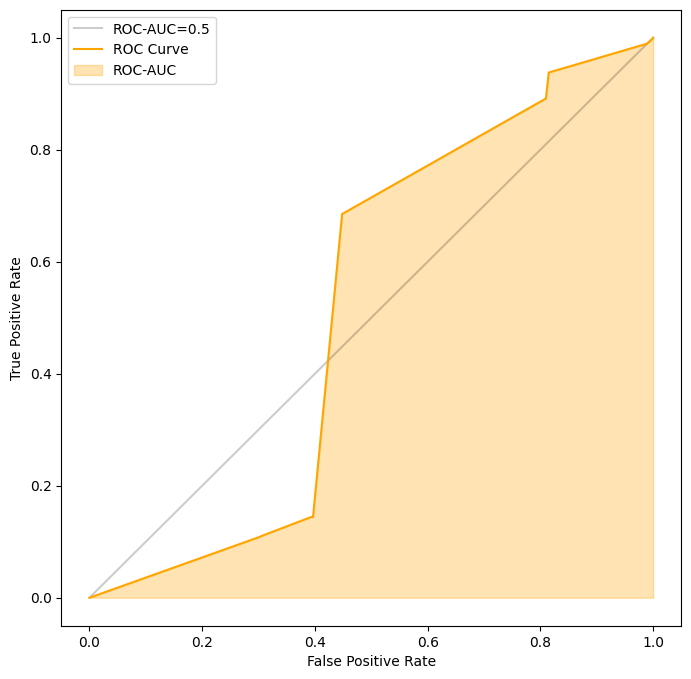

In [129]:
plot_roc_curve(y_test, y_pred)